In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

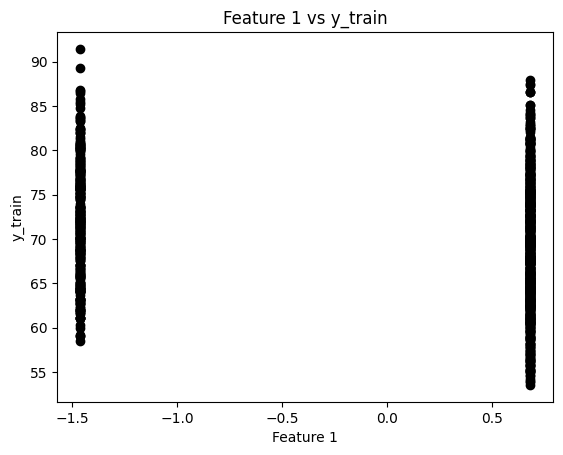

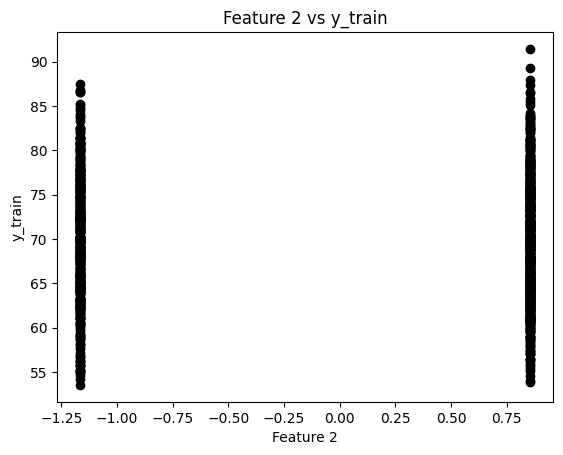

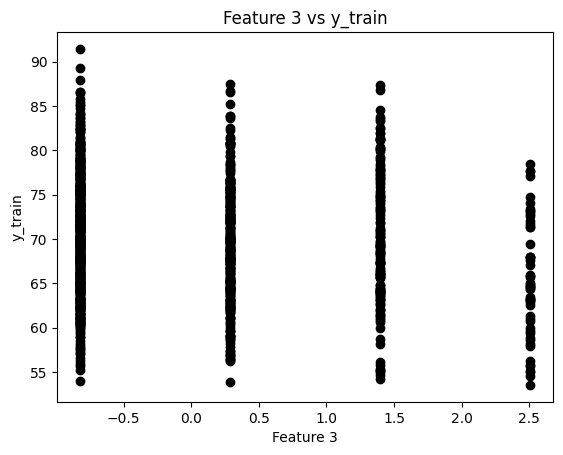

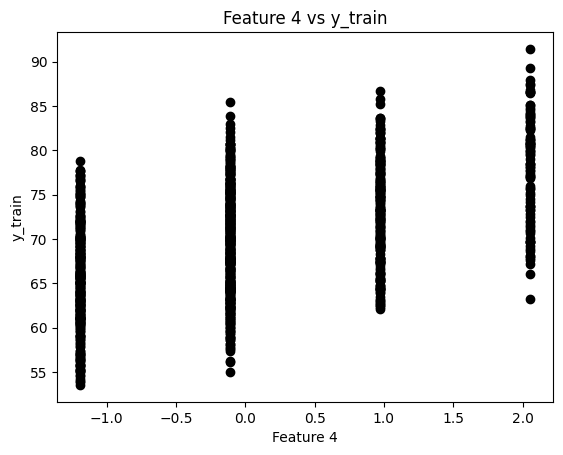

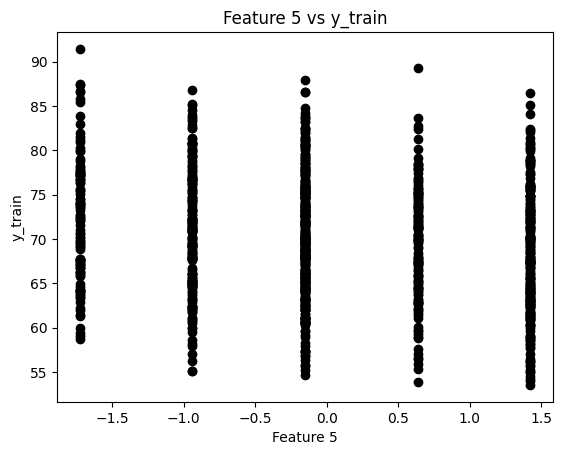

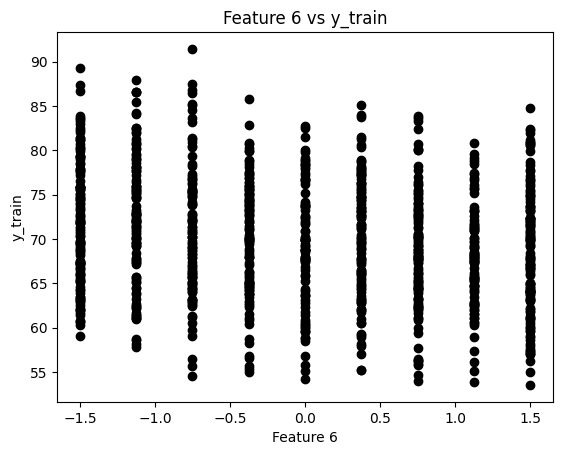

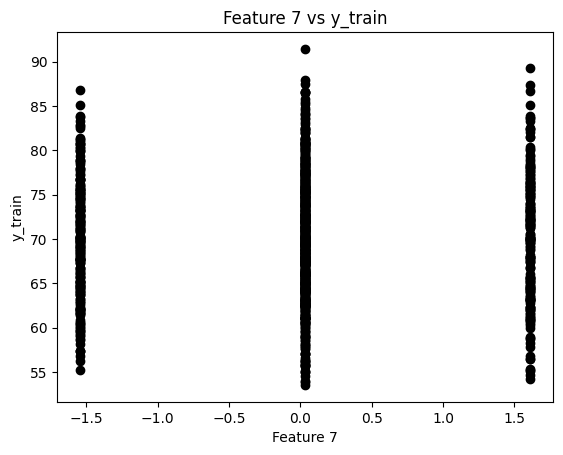

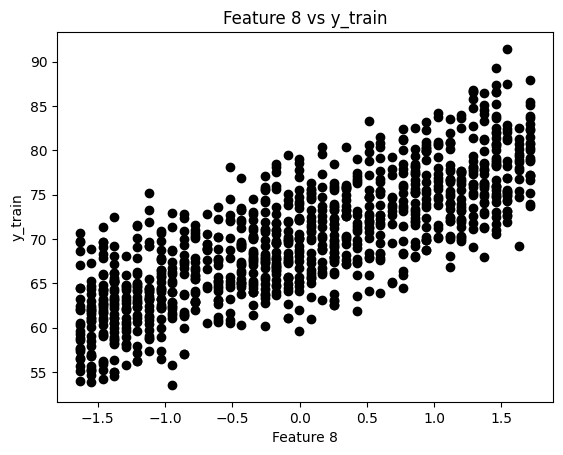

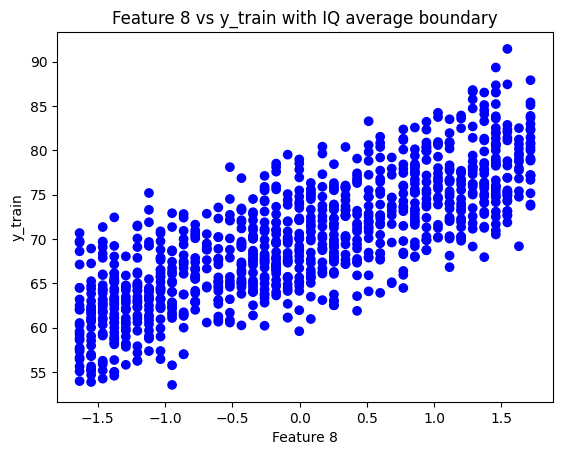

In [130]:
data = pd.read_excel('/content/drive/MyDrive/learner space ML/Training data.xlsx')
x_train = np.array(data.iloc[:, 0:8])
y_train = np.array(data.iloc[:, 8]).reshape(-1, 1)

from sklearn.preprocessing import LabelEncoder

# IQ average
def above_average(x):
    return np.where(x > 109.026, 1, 0)

# Feature function
def feature_changing(x_train, data):

    label_encoder = LabelEncoder()

    categorical_features = ["sex", "internet"]
    for feature in categorical_features:
        if feature in data.columns:
            col_index = data.columns.get_loc(feature)
            x_train[:, col_index] = label_encoder.fit_transform(data[feature])

    x_train = x_train.astype(float)

    new_feature = above_average(x_train[:, 7])
    new_feature = new_feature.reshape(-1, 1)
    x_train = np.column_stack((x_train, new_feature))

    return x_train

x_train = feature_changing(x_train, data)
x_train = x_train.astype(np.float64)
x_train, x_std, x_mean = z_score(x_train)

# y_train with different features
for i in range(x_train.shape[1] - 1):
    plt.scatter(x_train[:, i], y_train, color='black')
    plt.title(f'Feature {i+1} vs y_train')
    plt.xlabel(f'Feature {i+1}')
    plt.ylabel('y_train')
    plt.show()

# 8th feature
colors = ['red' if value == 0 else 'blue' for value in x_train[:, 8]] #(blue denotes iq > 109.026 , red denotes iq < 109.026)
plt.scatter(x_train[:, 7], y_train, color = colors)
plt.title('Feature 8 vs y_train with IQ average boundary')
plt.xlabel('Feature 8')
plt.ylabel('y_train')
plt.show()

In [131]:
def z_score(x_train):
    xMean = np.mean(x_train, axis=0)
    xStd = np.std(x_train, axis=0)
    xTrain = (x_train - x_mean) / x_std
    return xTrain, xStd, xMean

In [132]:
def cost(x_train, y_train, w, b):
    m = x_train.shape[0]
    predictions = np.dot(x_train, w) + b
    errors = predictions - y_train
    loss = (1 / (2 * m)) * np.sum(errors ** 2)
    return loss

In [133]:
def gradient_descent(x_train, y_train, w, b, learning_rate=0.01):
    m = x_train.shape[0]
    predictions = np.dot(x_train, w) + b
    errors = predictions - y_train
    dj_dw = (1 / m) * np.dot(x_train.T, errors)
    dj_db = (1 / m) * np.sum(errors)
    w = w - learning_rate * dj_dw
    b = b - learning_rate * dj_db
    return w, b

In [134]:
np.random.seed(2147473647)
w = np.random.randn(x_train.shape[1], 1)
b = np.random.randn(1)

old_cost = cost(x_train, y_train, w, b) + 1
current_cost = cost(x_train, y_train, w, b)

while abs(old_cost - current_cost) > 0.00001:
    old_cost = current_cost
    w, b = gradient_descent(x_train, y_train, w, b)
    current_cost = cost(x_train, y_train, w, b)

test_data = pd.read_excel('/content/drive/MyDrive/learner space ML/Test data.xlsx')
x_predict = test_data.iloc[:, :8].to_numpy()
x_predict = feature_changing(x_predict, test_data)
x_predict = (x_predict - x_mean) / x_std
ans = test_data.iloc[:, 8].to_numpy()

y_predict = np.dot(x_predict, w) + b

accuracy = 0
for dim in range(len(ans)):
    if abs(y_predict[dim] - ans[dim]) < 0.5: # do not change the tolerance as you'll be checked on +- 0.5 error only
        accuracy += 1
accuracy = round(accuracy * 100 / len(ans), 2)
ok = 'Congratulations' if accuracy > 95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")

Congratulations, your accuracy is 100.0%
